In [1]:
# Standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option("display.max_columns",30)

In [3]:
data_binary = pd.read_csv('Diabetes_2022.csv')

In [4]:
data_binary

,Diabetes_01,BMI,Smoker,HeavyAlcoholConsumption,DepressiveDisorded,ChronicOPD,Asthma,Stroke,HeartAttack,CoronaryHeartDisease,KidneyProblem,Arthritis,ToothProblem,PhysicalActivity,TreatmentCostTooHigh,HealthCareCoverage,GeneralHealth,MentallHealth,PhysicalHealth,DifficultyWalking,Age,Sex,Education,Income,Covid
0,0,3,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2,0,4,0,10,2,3,6,0
1,1,4,2,0,0,0,0,0,0,0,0,1,0,1,0,1,2,0,0,0,11,1,3,5,0
2,0,3,2,0,0,0,0,0,0,0,0,0,1,0,0,1,4,0,30,0,11,1,4,5,0
3,0,4,2,0,0,0,0,0,0,0,0,1,1,0,0,1,2,0,0,1,12,1,4,5,1
4,0,4,0,0,1,0,0,0,0,0,0,1,0,1,0,1,4,0,5,1,13,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285384,0,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,4,7,0,0,2,2,4,2,1
285385,1,3,0,0,0,0,0,1,0,0,0,1,1,1,0,1,3,15,0,0,10,1,4,6,1
285386,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,3,1,4,5,1
285387,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,2,0,7,2,4,5,0


In [5]:
data_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285389 entries, 0 to 285388
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Diabetes_01              285389 non-null  int64
 1   BMI                      285389 non-null  int64
 2   Smoker                   285389 non-null  int64
 3   HeavyAlcoholConsumption  285389 non-null  int64
 4   DepressiveDisorded       285389 non-null  int64
 5   ChronicOPD               285389 non-null  int64
 6   Asthma                   285389 non-null  int64
 7   Stroke                   285389 non-null  int64
 8   HeartAttack              285389 non-null  int64
 9   CoronaryHeartDisease     285389 non-null  int64
 10  KidneyProblem            285389 non-null  int64
 11  Arthritis                285389 non-null  int64
 12  ToothProblem             285389 non-null  int64
 13  PhysicalActivity         285389 non-null  int64
 14  TreatmentCostTooHigh     285389 non-

array([[<Axes: title={'center': 'Diabetes_01'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'HeavyAlcoholConsumption'}>,
        <Axes: title={'center': 'DepressiveDisorded'}>],
       [<Axes: title={'center': 'ChronicOPD'}>,
        <Axes: title={'center': 'Asthma'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartAttack'}>,
        <Axes: title={'center': 'CoronaryHeartDisease'}>],
       [<Axes: title={'center': 'KidneyProblem'}>,
        <Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'ToothProblem'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'TreatmentCostTooHigh'}>],
       [<Axes: title={'center': 'HealthCareCoverage'}>,
        <Axes: title={'center': 'GeneralHealth'}>,
        <Axes: title={'center': 'MentallHealth'}>,
        <Axes: title={'center': 'PhysicalHealth'}>,
        <Axes: title={'center': '

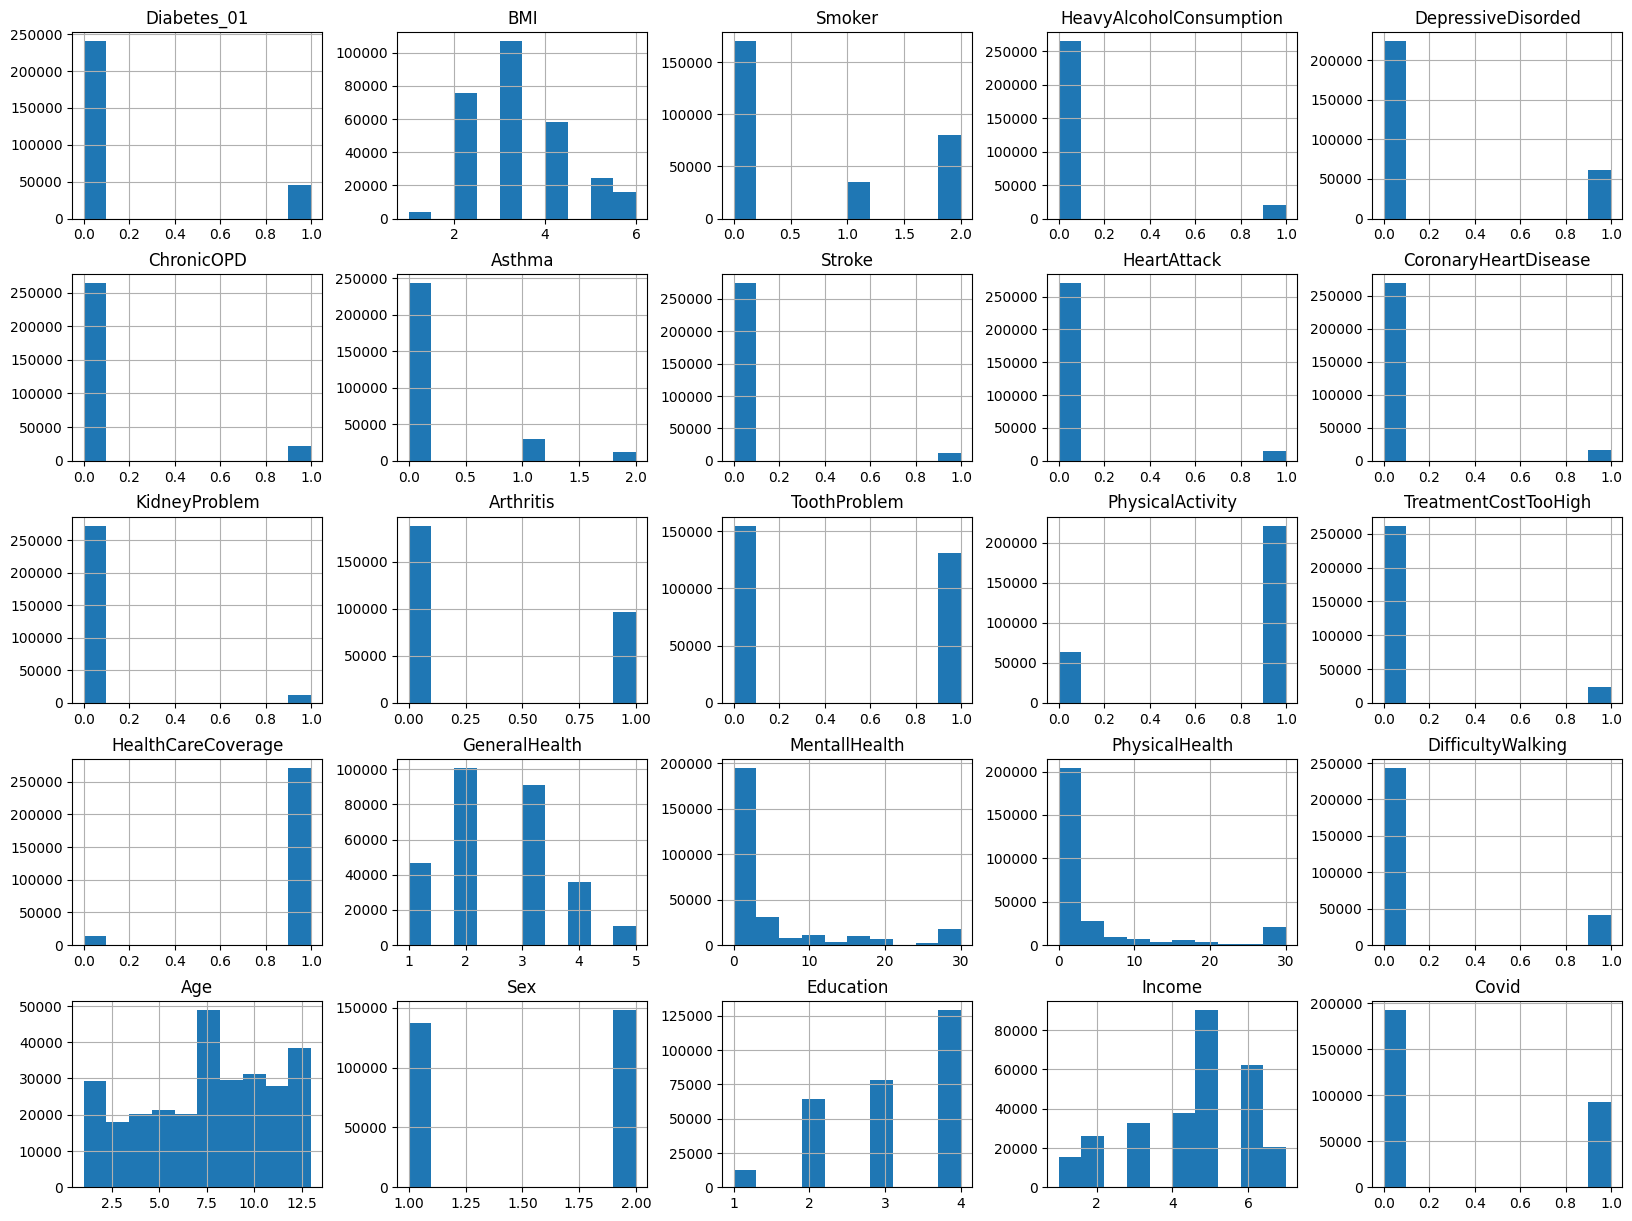

In [7]:
data_binary.hist(figsize=(20,15))

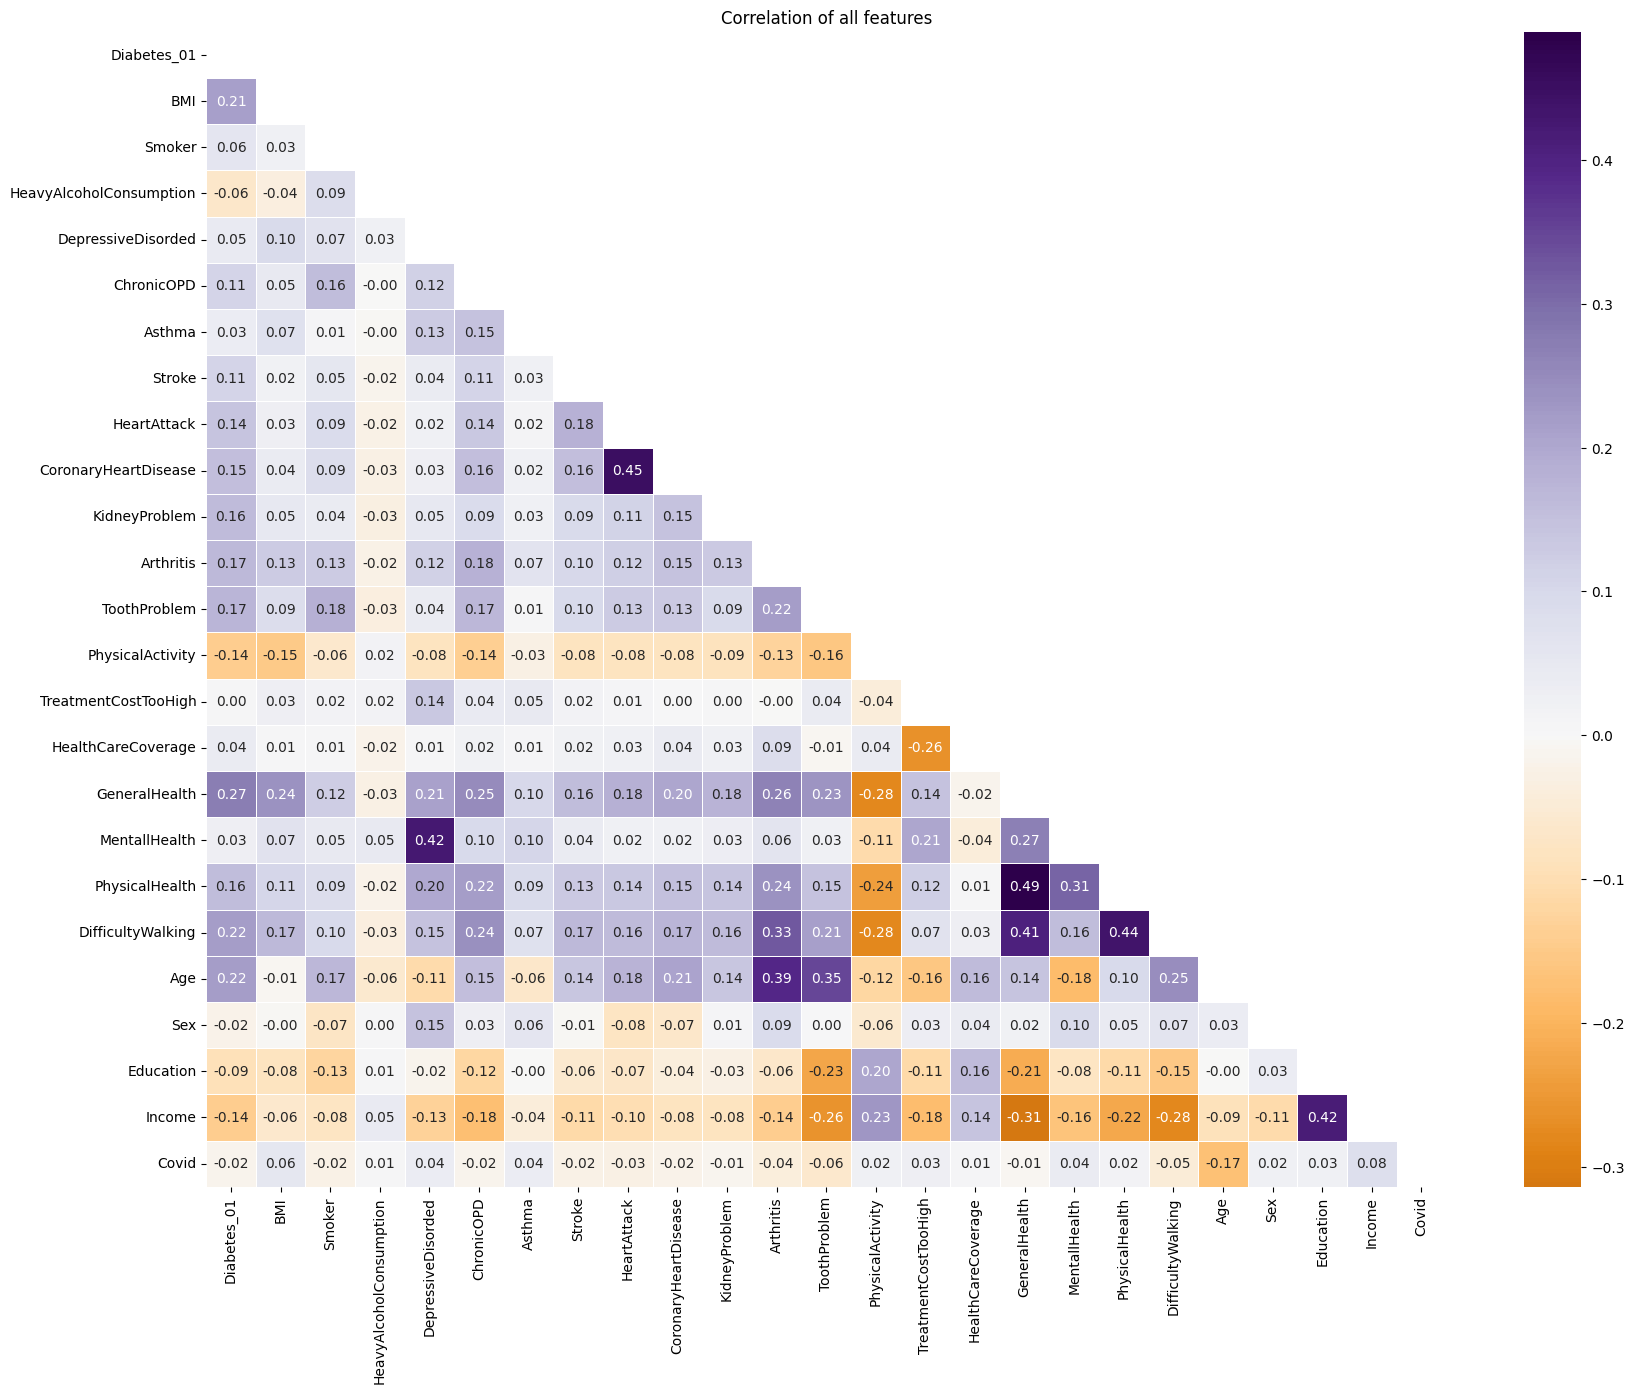

In [9]:
# Creat mask
mask = np.zeros_like(data_binary.corr())
mask[np.triu_indices_from(mask)] = True
# Heatmap of correlation
plt.figure(figsize = (20,15))
sns.heatmap(data_binary.corr(), mask=mask, annot=True, cmap ='PuOr', square=False, linewidths=0.5, fmt=".2f", center=0)
plt.title("Correlation of all features")
plt.show()

- The occurrence of depressive disorders is related to the number of days in which the patient's mental condition was poor. The correlation is positive equal to 0.42.
- Chronic obstructive pulmonary disease is related to whether a person smokes cigarettes, has difficulty walking up and down stairs, and is not exercising outside of work and earnings (0.24).
- A person's feelings about their health are related to almost all analyzed factors.
- With age, the risk of arthritis, heart diseases and tooth problems increases, and hence the risk of diabetes in this person.
- No surprise when comparing annual earnings and education. The better the education, the more a person earns.
- The big surprise is that alcohol abuse do not significantly affect any of the variables.

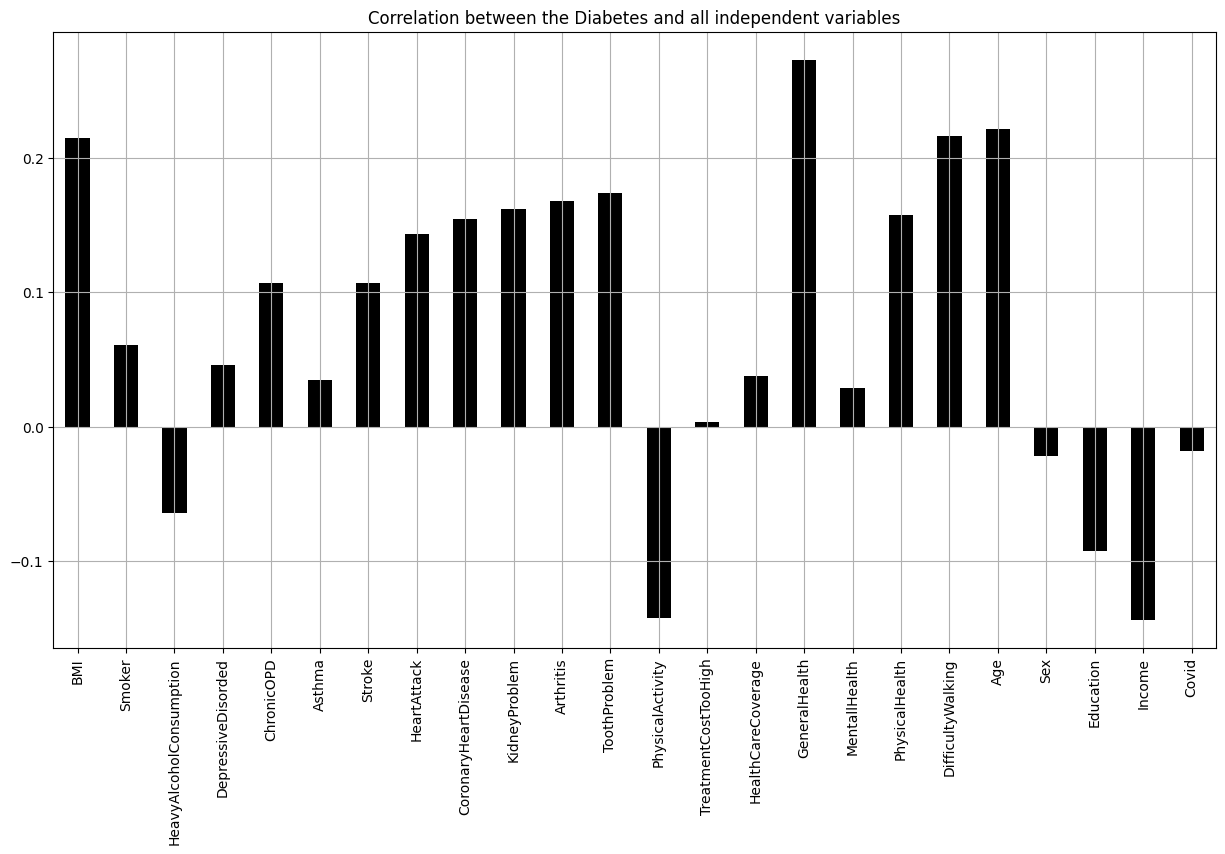

In [10]:
data_binary.drop('Diabetes_01', axis=1).corrwith(data_binary.Diabetes_01).plot(
    kind='bar', grid=True, figsize=(15, 8), 
    title="Correlation between the Diabetes and all independent variables",color="black");

- The onset of diabetes is most strongly correlated with kidney problems, tooth problemas, development of higher BMI, difficulty walking with increasing age, and whether a person generally feels weak, which is related to their physical and mental condition.
- Less depends on whether the person has had or has asthma, lung problems, alcohol abuse, has had a heart attack, is better educated and earns more, the more exercise outside of work is less.
- The impact of a person's gender or having health insurance or covid on the occurrence of cyclic disease is negligible.

### Visualization of relationships between variables

In [11]:
diabetes = data_binary['Diabetes_01'].replace({0.0:'Healthy', 1.0:'Pre-diabetic or Diabetic'})

bmi = pd.Series.sort_values(data_binary['BMI'].replace({1.0:'Underweight', 2.0:'Normal Weight', 
                                                        3.0:'Overweight', 4.0:'Obesity I', 
                                                        5.0:'Obesity II', 6.0:'Obesity III'}))

smoker = pd.Series.sort_values(data_binary['Smoker'].replace({0.0:'Never', 1.0:'Current', 2.0:'Former'}))

alcohol = data_binary['HeavyAlcoholConsumption'].replace({0.0:'No', 1.0:'Yes'})

depressive = data_binary['DepressiveDisorded'].replace({0.0:'No', 1.0:'Yes'})

copd = data_binary['ChronicOPD'].replace({0.0:'No', 1.0:'Yes'})

asthma = pd.Series.sort_values(data_binary['Asthma'].replace({0.0:'Never', 1.0:'Current', 2.0:'Former'}))

stroke = data_binary['Stroke'].replace({0.0:'No', 1.0:'Yes'})

heartattack = data_binary['HeartAttack'].replace({0.0:'No', 1.0:'Yes'})

coronaryheart = data_binary['CoronaryHeartDisease'].replace({0.0:'No', 1.0:'Yes'})

kidney = data_binary['KidneyProblem'].replace({0.0:'No', 1.0:'Yes'})

arthritis = data_binary['Arthritis'].replace({0.0:'No', 1.0:'Yes'})

toothproblem = data_binary['ToothProblem'].replace({0.0:'No', 1.0:'Yes'})

activity = data_binary['PhysicalActivity'].replace({0.0:'No physical activity or exercise', 
                                                    1.0:'Had physical activity or exercise'})

costtoohigh = data_binary['TreatmentCostTooHigh'].replace({0.0:'No', 1.0:'Yes'})

carecoverage = data_binary['HealthCareCoverage'].replace({0.0:'No', 1.0:'Yes'})

generalhealth = pd.Series.sort_values(data_binary['GeneralHealth'].replace({1.0:'Excellent', 2.0:'Very good', 
                                                                            3.0:'Good', 4.0:'Fair', 5.0:'Poor'}))

diffiwalk = data_binary['DifficultyWalking'].replace({0.0:'No', 1.0:'Yes'})

age = pd.Series.sort_values(data_binary['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))

sex = data_binary['Sex'].replace({1.0:'Male', 2.0:'Female'})

education = pd.Series.sort_values(data_binary['Education'].replace({1.0:'Never attended school', 2.0:'Elementary school', 
                                                                    3.0:'Some high school', 4.0:'High school graduate', 
                                                                    5.0:'Some college or technical school', 
                                                                    6.0:'College graduate'}))

income = pd.Series.sort_values(data_binary['Income'].replace({1.0:'Less than 15,000', 2.0:'15,000 to 25,000', 
                                                              3.0:'25,000 to 35,000', 4.0:'35,000 to 50,000',
                                                              5.0:'50,000 to 100,000', 6.0:'100,000 to 200,000',
                                                              7.0:'200,000 more'}))

covid = data_binary['Covid'].replace({0.0:'No', 1.0:'Yes'})


#### Relationship between BMI and Diabetes

C:\Users\shrus\AppData\Local\Temp\ipykernel_19200\2078447866.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels = (['Underweight', 'Normal Weight', 'Overweight', 'Obesity I degree',


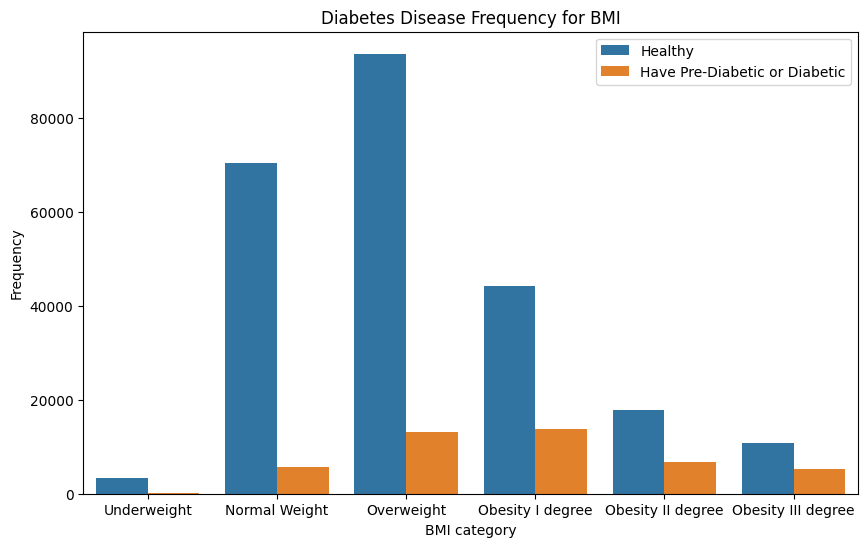

In [12]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='BMI', data=data_binary, hue=diabetes)
ax.set(xticklabels = (['Underweight', 'Normal Weight', 'Overweight', 'Obesity I degree', 
                       'Obesity II degree', 'Obesity III degree']))
plt.title('Diabetes Disease Frequency for BMI')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('BMI category')
plt.show()

In [13]:
bmi_df = pd.crosstab(bmi, diabetes, rownames=['BMI category'], colnames=['Diabetes'])
bmi_df['Healthy [%]'] = round((bmi_df['Healthy'] / bmi_df['Healthy'].sum()) * 100,1)
bmi_df['Pre-diabetic or Diabetic [%]'] = round((bmi_df['Pre-diabetic or Diabetic'] / 
                                                bmi_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
bmi_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
BMI category,,,,
Normal Weight,70306,5617,29.2,12.5
Obesity I,44297,13750,18.4,30.6
Obesity II,17911,6758,7.4,15.1
Obesity III,10893,5267,4.5,11.7
Overweight,93643,13239,38.9,29.5
Underweight,3452,256,1.4,0.6


#### Relationship between Smoker and Diabetes

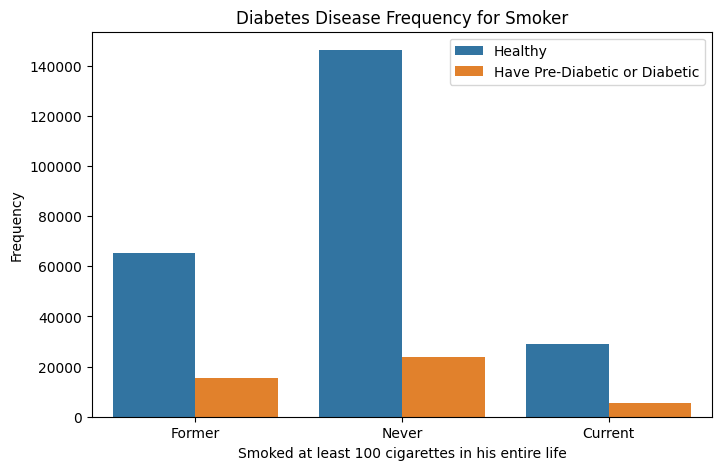

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=smoker, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Smoker')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Smoked at least 100 cigarettes in his entire life')
plt.show()

#### Relationship between Heavy drinkers and Diabetes

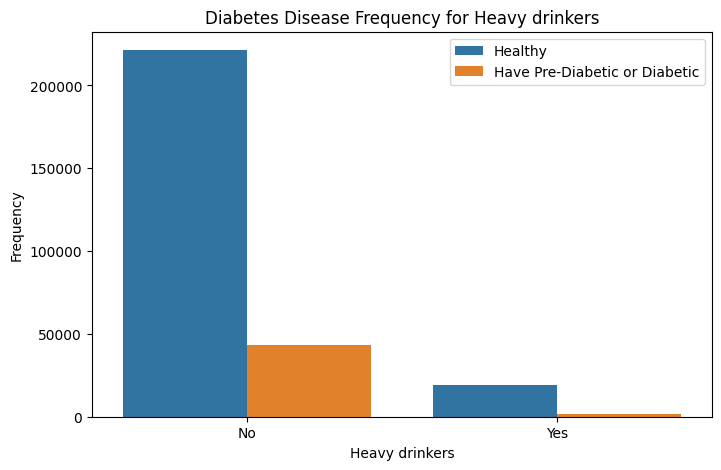

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=alcohol, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Heavy drinkers')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Heavy drinkers')
plt.show()

In [18]:
alcohol_df = pd.crosstab(diabetes, alcohol, rownames=['Diabetes'], colnames=['Heavy Alcohol Consumption'])
alcohol_df['No [%]'] = round((alcohol_df['No'] / alcohol_df['No'].sum()) * 100,1)
alcohol_df['Yes [%]'] = round((alcohol_df['Yes'] / alcohol_df['Yes'].sum()) * 100,1)
alcohol_df

Heavy Alcohol Consumption,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,221395,19107,83.6,92.6
Pre-diabetic or Diabetic,43360,1527,16.4,7.4


We can see that excessive alcohol consumption does not affect the development of the disease. This is one of the most striking dependencies.

#### Relationship between Depressive Disorder and Diabetes

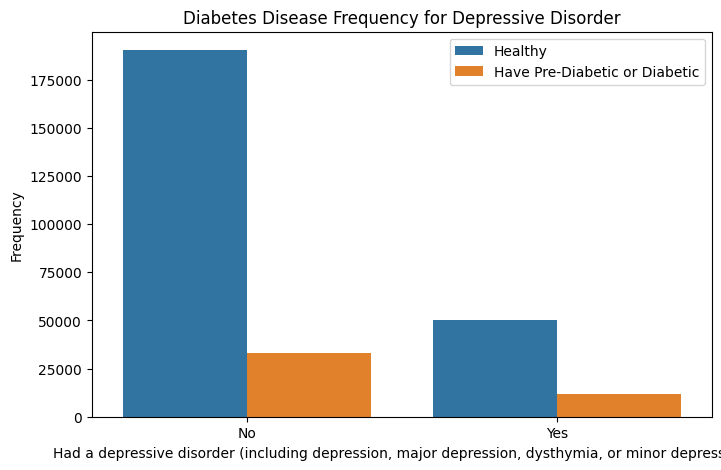

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x=depressive, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Depressive Disorder')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Had a depressive disorder (including depression, major depression, dysthymia, or minor depression)')
plt.show()

In [20]:
depressive_df = pd.crosstab(diabetes, depressive, rownames=['Diabetes'], colnames=['Depressive Disorded'])
depressive_df['No [%]'] = round((depressive_df['No'] / depressive_df['No'].sum()) * 100,1)
depressive_df['Yes [%]'] = round((depressive_df['Yes'] / depressive_df['Yes'].sum()) * 100,1)
depressive_df

Depressive Disorded,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,190476,50026,85.1,81.1
Pre-diabetic or Diabetic,33232,11655,14.9,18.9


We see that the appearance of a depressive disorder, including depression, major depression, dysthymia or mild depression, has little effect on the number of diabetics.

#### Relationship between Chronic Obstructive Pulmonary Disease (C.O.P.D.) and Diabetes

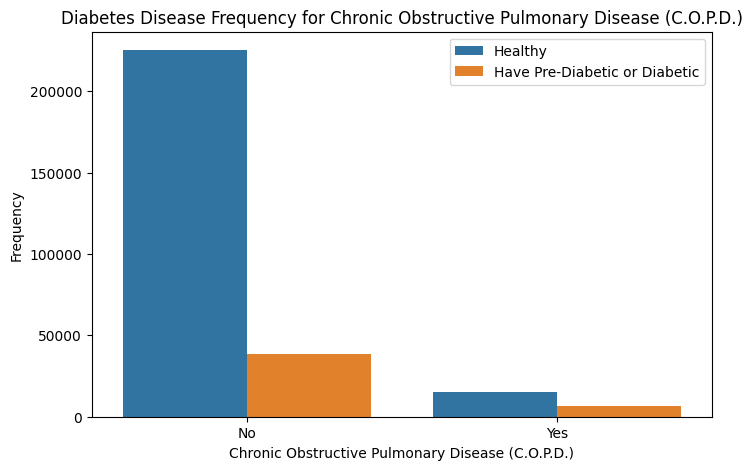

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x=copd, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Chronic Obstructive Pulmonary Disease (C.O.P.D.)')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Chronic Obstructive Pulmonary Disease (C.O.P.D.)')
plt.show()

In [22]:
copd_df = pd.crosstab(diabetes, copd, rownames=['Diabetes'], colnames=['C.O.P.D.'])
copd_df['No [%]'] = round((copd_df['No'] / copd_df['No'].sum()) * 100,1)
copd_df['Yes [%]'] = round((copd_df['Yes'] / copd_df['Yes'].sum()) * 100,1)
copd_df

C.O.P.D.,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,225265,15237,85.4,70.7
Pre-diabetic or Diabetic,38564,6323,14.6,29.3


We can see that the onset of chronic obstructive pulmonary disease in the respondent increases the risk of developing diabetes. 30% of people suffering from this disease have diabetes or pre-diabetes. Compared to people without lung disease, which is 15 percentage points less.

#### Relationship between Asthma and Diabetes

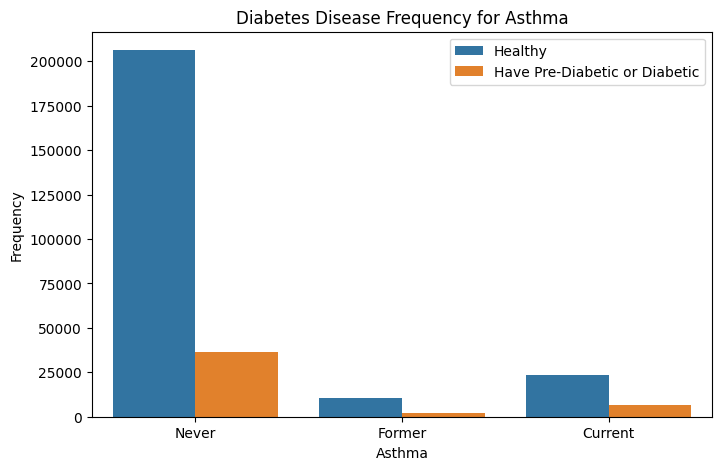

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x=asthma, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Asthma')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Asthma')
plt.show()

In [24]:
asthma_df = pd.crosstab(asthma, diabetes, rownames=['Asthma'], colnames=['Diabetes'])
asthma_df['Healthy [%]'] = round((asthma_df['Healthy'] / asthma_df['Healthy'].sum()) * 100,1)
asthma_df['Pre-diabetic or Diabetic [%]'] = round((asthma_df['Pre-diabetic or Diabetic'] / 
                                                   asthma_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
asthma_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
Asthma,,,,
Current,23585,6468,9.8,14.4
Former,10627,2015,4.4,4.5
Never,206290,36404,85.8,81.1


We can see that our dataset includes a small number of people who previously had or currently have asthma. We can see that the percentage of people with diabetes currently having asthma is slightly higher.

#### Relationship between Stroke and Diabetes

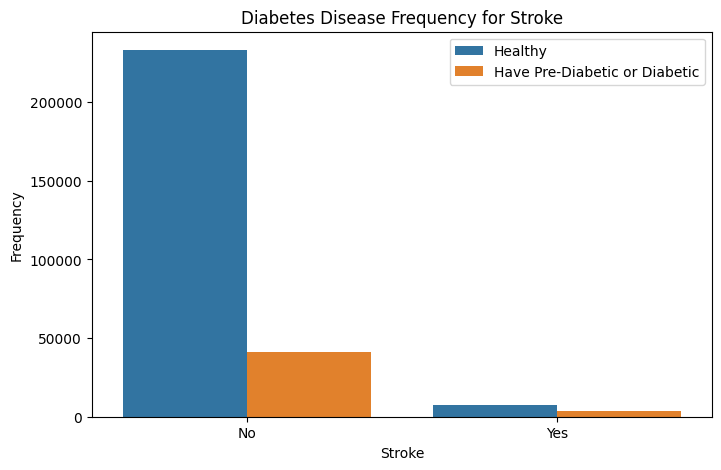

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x=stroke, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Stroke')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Stroke')
plt.show()

In [26]:
stroke_df = pd.crosstab(diabetes, stroke, rownames=['Diabetes'], colnames=['Stroke'])
stroke_df['No [%]'] = round((stroke_df['No'] / stroke_df['No'].sum()) * 100,1)
stroke_df['Yes [%]'] = round((stroke_df['Yes'] / stroke_df['Yes'].sum()) * 100,1)
stroke_df

Stroke,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,233112,7390,85.1,65.2
Pre-diabetic or Diabetic,40937,3950,14.9,34.8


We see that as many as 1/3 of people who have a stroke are diagnosed with pre-diabetes or diabetes. For people without a stroke, this percentage is half that.

#### Relationship between Heart Attack and Diabetes

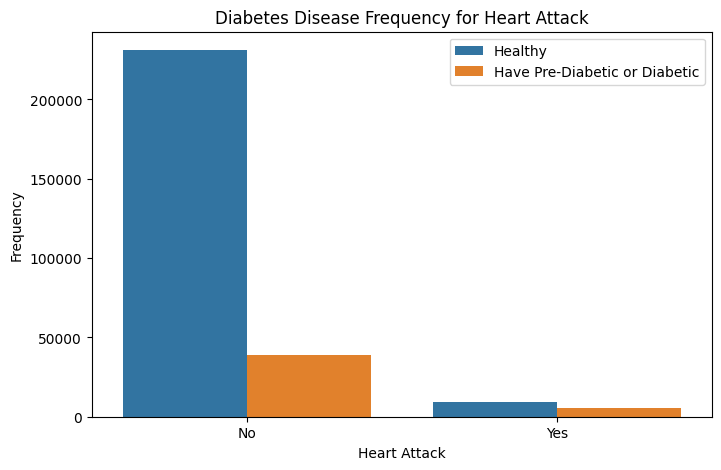

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(x=heartattack, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Heart Attack')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Heart Attack')
plt.show()

In [28]:
heartattack_df = pd.crosstab(diabetes, heartattack, rownames=['Diabetes'], colnames=['Heart Attack'])
heartattack_df['No [%]'] = round((heartattack_df['No'] / heartattack_df['No'].sum()) * 100,1)
heartattack_df['Yes [%]'] = round((heartattack_df['Yes'] / heartattack_df['Yes'].sum()) * 100,1)
heartattack_df

Heart Attack,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,231108,9394,85.5,62.2
Pre-diabetic or Diabetic,39181,5706,14.5,37.8


We can see that the case of a heart attack is very similar to a stroke.
Almost 40% of people who have had a heart attack are diagnosed with prediabetes or diabetes. In the case of people without a heart attack, the percentage is 15%. 

#### Relationship between Coronary Heart Disease and Diabetes

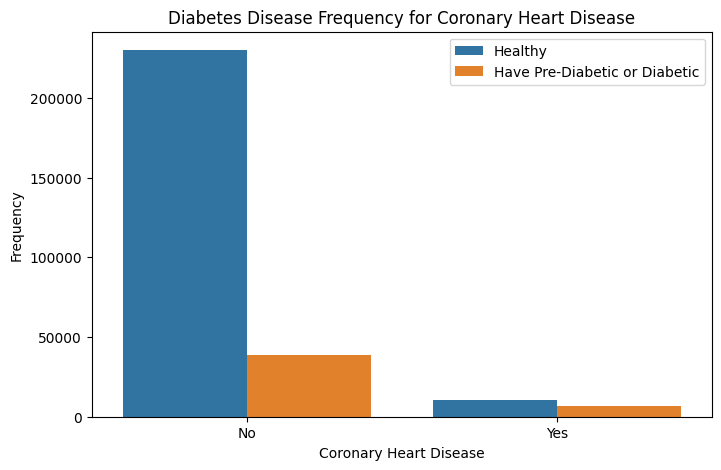

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x=coronaryheart, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Coronary Heart Disease')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Coronary Heart Disease')
plt.show()

In [30]:
coronaryheart_df = pd.crosstab(diabetes, coronaryheart, rownames=['Diabetes'], colnames=['Coronary Heart Disease'])
coronaryheart_df['No [%]'] = round((coronaryheart_df['No'] / coronaryheart_df['No'].sum()) * 100,1)
coronaryheart_df['Yes [%]'] = round((coronaryheart_df['Yes'] / coronaryheart_df['Yes'].sum()) * 100,1)
coronaryheart_df

Coronary Heart Disease,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,230053,10449,85.7,61.8
Pre-diabetic or Diabetic,38441,6446,14.3,38.2


We see that in the case of angina or coronary heart disease the situation is analogous to that of the heart attack variable.

#### Relationship between Coronary Heart Disease and Kidney Problems

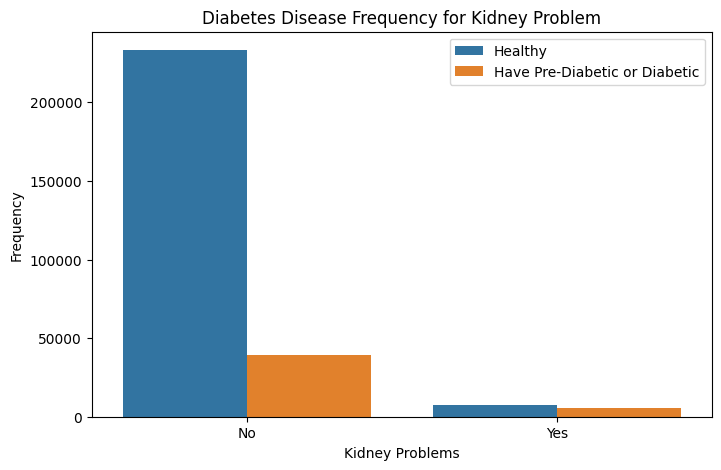

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x=kidney, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Kidney Problem')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Kidney Problems')
plt.show()

In [34]:
kidney_df = pd.crosstab(diabetes, kidney, rownames=['Diabetes'], colnames=['Kidney Problem'])
kidney_df['No [%]'] = round((kidney_df['No'] / kidney_df['No'].sum()) * 100,1)
kidney_df['Yes [%]'] = round((kidney_df['Yes'] / kidney_df['Yes'].sum()) * 100,1)
kidney_df

Kidney Problem,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,233232,7270,85.5,57.1
Pre-diabetic or Diabetic,39419,5468,14.5,42.9


We can see that nearly 43% of people who had some kind of kidney problems had pre-diabetes or diabetes

#### Relationship between Coronary Heart Disease and Tooth Problems

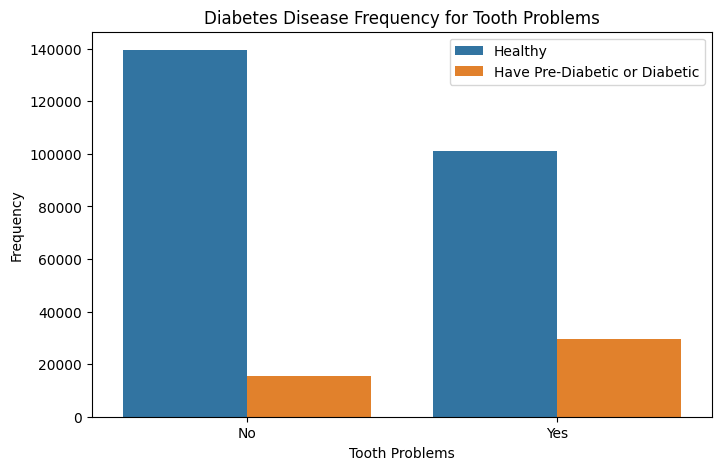

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x=toothproblem, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Tooth Problems')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Tooth Problems')
plt.show()

In [36]:
toothproblem_df = pd.crosstab(diabetes, toothproblem, rownames=['Diabetes'], colnames=['Tooth Problem'])
toothproblem_df ['No [%]'] = round((toothproblem_df ['No'] / toothproblem_df ['No'].sum()) * 100,1)
toothproblem_df ['Yes [%]'] = round((toothproblem_df ['Yes'] / toothproblem_df ['Yes'].sum()) * 100,1)
toothproblem_df 

Tooth Problem,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,139479,101023,90.1,77.4
Pre-diabetic or Diabetic,15384,29503,9.9,22.6


Approximately 23% people with diabetes have tooth problems

#### Relationship between Coronary Heart Disease and Arthritis

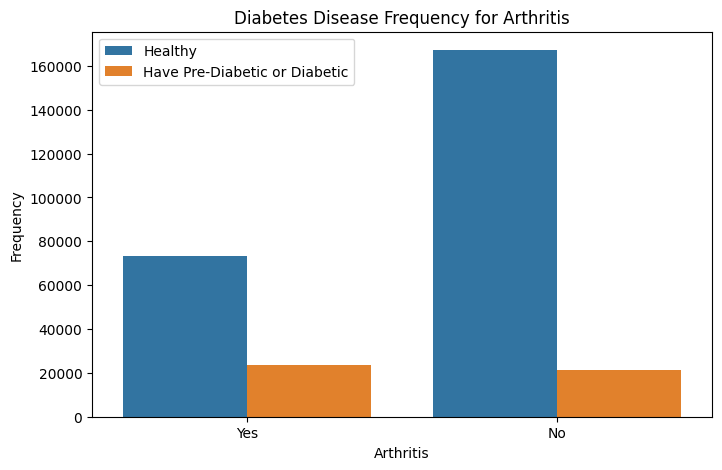

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x=arthritis, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Arthritis')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Arthritis')
plt.show()

In [37]:
arthritis_df = pd.crosstab(diabetes, arthritis, rownames=['Diabetes'], colnames=['Arthritis'])
arthritis_df ['No [%]'] = round((arthritis_df ['No'] / arthritis_df ['No'].sum()) * 100,1)
arthritis_df ['Yes [%]'] = round((arthritis_df ['Yes'] / arthritis_df ['Yes'].sum()) * 100,1)
arthritis_df 

Arthritis,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,167190,73312,88.6,75.8
Pre-diabetic or Diabetic,21430,23457,11.4,24.2


1/4 of the population who suffers from arthritis also has diabetes

#### Relationship between Physical Activity and Diabetes

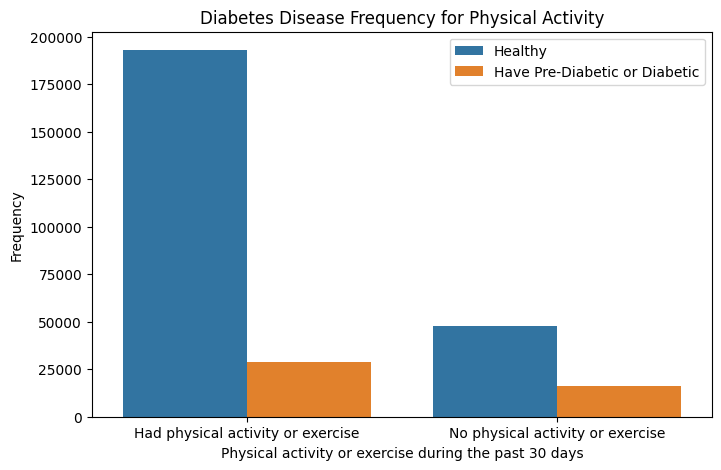

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x=activity, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Physical Activity')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Physical activity or exercise during the past 30 days')
plt.show()

In [39]:
activity_df = pd.crosstab(diabetes, activity, rownames=['Diabetes'], colnames=['Physical activity'])
activity_df['Had physical activity or exercise [%]'] = round((activity_df['Had physical activity or exercise'] / 
                                                              activity_df['Had physical activity or exercise'].sum()) * 100,1)
activity_df['No physical activity or exercise [%]'] = round((activity_df['No physical activity or exercise'] / 
                                activity_df['No physical activity or exercise'].sum()) * 100,1)
activity_df

Physical activity,Had physical activity or exercise,No physical activity or exercise,Had physical activity or exercise [%],No physical activity or exercise [%]
Diabetes,,,,
Healthy,192988,47514,87.0,74.6
Pre-diabetic or Diabetic,28723,16164,13.0,25.4


We can see that as many as every fourth person who does not play sports or does not exercise, is at risk of developing diabetes. Only 13% of people who practice any sport at least once a month are diabetic.

#### Relationship between General Health and Diabetes

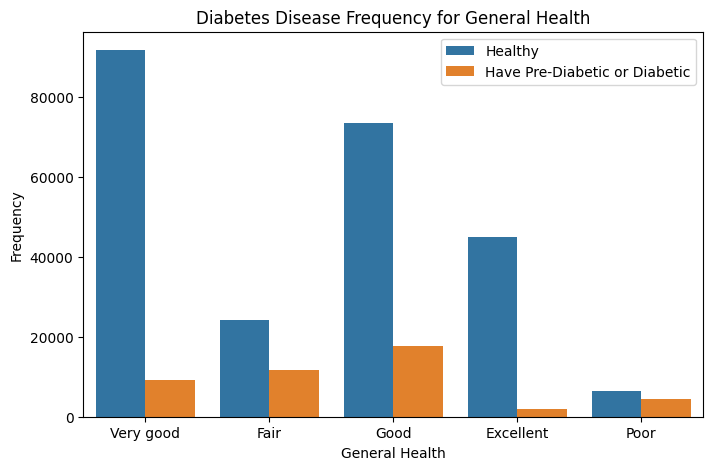

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x=generalhealth, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for General Health')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('General Health')
plt.show()

In [46]:
generalhealth_df = pd.crosstab(generalhealth, diabetes, rownames=['General Health'], colnames=['Diabetes'])
generalhealth_df['Healthy [%]'] = round((generalhealth_df['Healthy'] / generalhealth_df['Healthy'].sum()) * 100,1)
generalhealth_df['Pre-diabetic or Diabetic [%]'] = round((generalhealth_df['Pre-diabetic or Diabetic'] / 
                                                          generalhealth_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
generalhealth_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
General Health,,,,
Excellent,44916,1839,18.7,4.1
Fair,24078,11692,10.0,26.0
Good,73396,17675,30.5,39.4
Poor,6500,4437,2.7,9.9
Very good,91612,9244,38.1,20.6


#### Relationship between Difficulty Walking and Diabetes

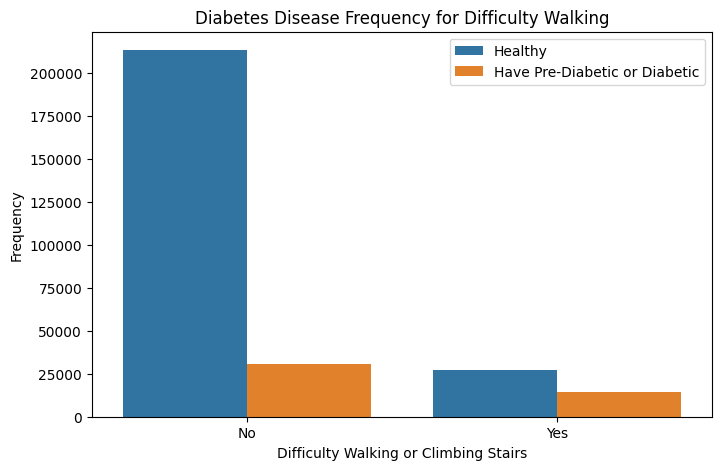

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(x=diffiwalk, data=data_binary, hue=diabetes)
plt.title('Diabetes Disease Frequency for Difficulty Walking')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Difficulty Walking or Climbing Stairs')
plt.show()

In [48]:
diffiwalk_df = pd.crosstab(diabetes, diffiwalk, rownames=['Diabetes'], colnames=['Difficulty Walking'])
diffiwalk_df['No [%]'] = round((diffiwalk_df['No'] / diffiwalk_df['No'].sum()) * 100,1)
diffiwalk_df['Yes [%]'] = round((diffiwalk_df['Yes'] / diffiwalk_df['Yes'].sum()) * 100,1)
diffiwalk_df

Difficulty Walking,No,Yes,No [%],Yes [%]
Diabetes,,,,
Healthy,213314,27188,87.5,65.2
Pre-diabetic or Diabetic,30389,14498,12.5,34.8


We see that difficulty in walking or climbing stairs is highly correlated with having diabetes. Over 35% of people who have difficulty walking are diagnosed with diabetes or diabetes. However, among people without these difficulties, only about 12% of people with diabetes are affected.

#### Relationship between Sex and Diabetes

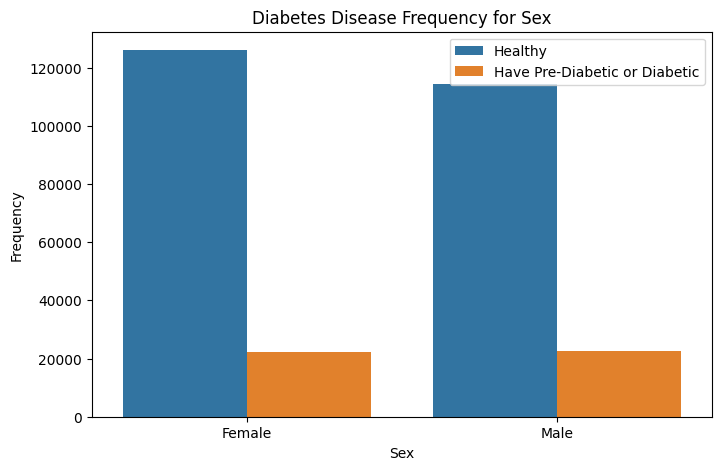

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x=sex, data=data_binary, hue='Diabetes_01')
plt.title('Diabetes Disease Frequency for Sex')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.show()

In [50]:
sex_df = pd.crosstab(diabetes, sex, rownames=['Diabetes'], colnames=['Sex'])
sex_df['Female [%]'] = round((sex_df['Female'] / sex_df['Female'].sum()) * 100,1)
sex_df['Male [%]'] = round((sex_df['Male'] / sex_df['Male'].sum()) * 100,1)
sex_df

Sex,Female,Male,Female [%],Male [%]
Diabetes,,,,
Healthy,126021,114481,85.0,83.4
Pre-diabetic or Diabetic,22171,22716,15.0,16.6


From the chart, we can read that gender has a slight influence on diabetes. 

#### Relationship between Age and Diabetes

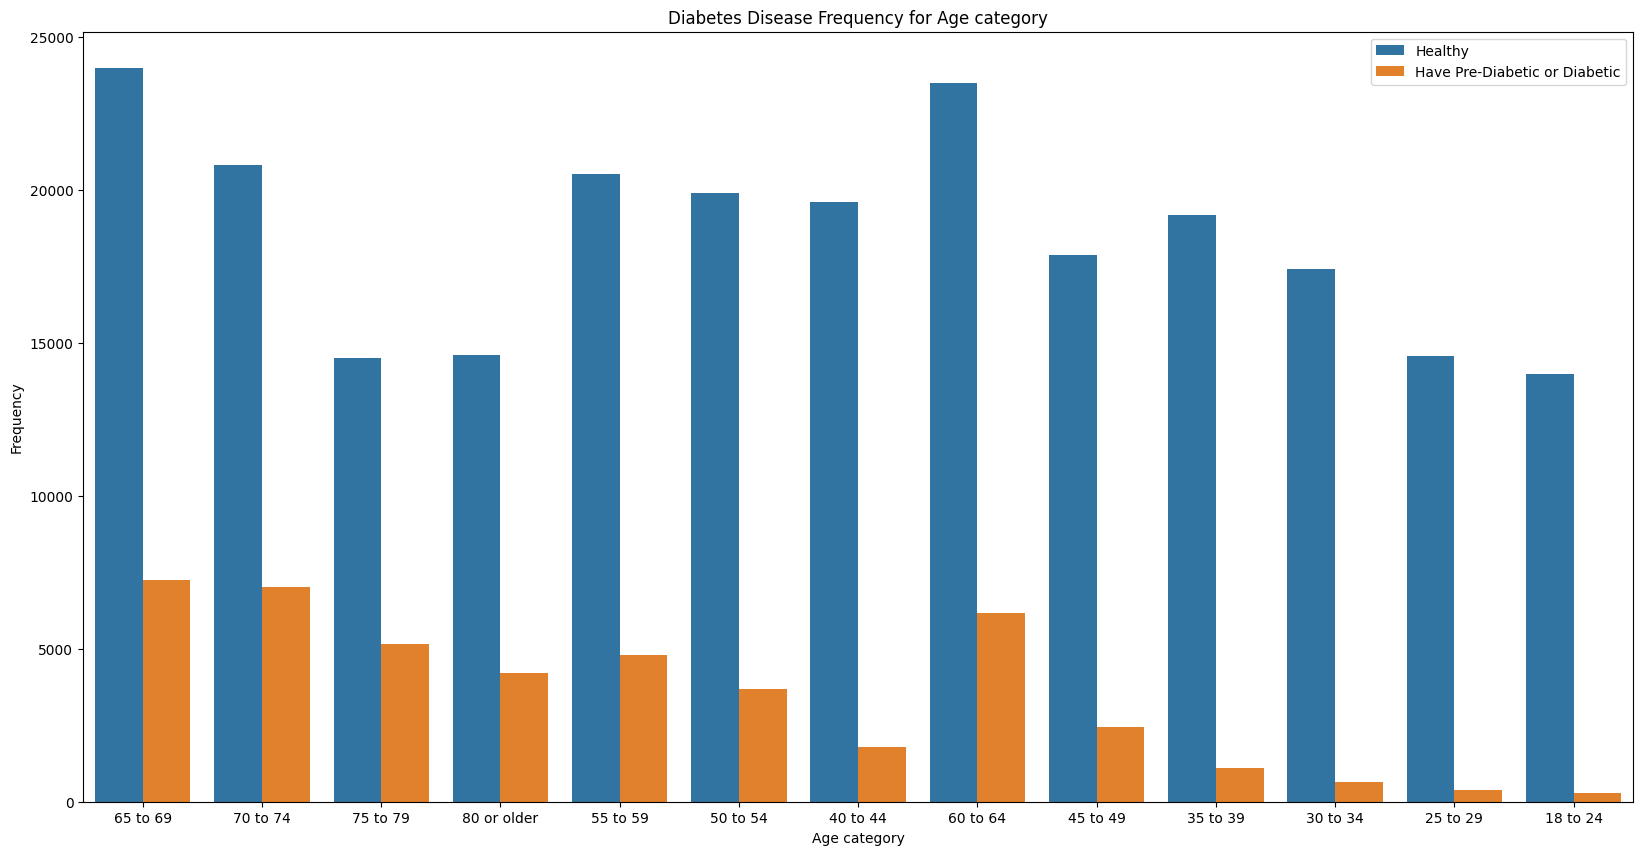

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(x=age, data=data_binary, hue='Diabetes_01')
plt.title('Diabetes Disease Frequency for Age category')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Age category')
plt.show()

In [52]:
age_df = pd.crosstab(age, diabetes, rownames=['Age category'], colnames=['Diabetes'])
age_df['Healthy [%]'] = round((age_df['Healthy'] / age_df['Healthy'].sum()) * 100,1)
age_df['Pre-diabetic or Diabetic [%]'] = round((age_df['Pre-diabetic or Diabetic'] /
                                                age_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
age_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
Age category,,,,
18 to 24,13992,278,5.8,0.6
25 to 29,14590,384,6.1,0.9
30 to 34,17405,643,7.2,1.4
35 to 39,19170,1113,8.0,2.5
40 to 44,19626,1773,8.2,3.9
45 to 49,17870,2439,7.4,5.4
50 to 54,19918,3675,8.3,8.2
55 to 59,20521,4809,8.5,10.7
60 to 64,23486,6163,9.8,13.7


We can see that age has a significant impact on whether or not a person develops diabetes or is at increased risk of developing it.\
We can read that almost 80% of all diabetics are people over 55 years of age.\
However, among people under 30 years of age, only 1.5% of people with diabetes in our data are.

#### Relationship between Age, Sex and Diabetes

In [53]:
age_male_0 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 0 & Sex == 1')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))
age_male_1 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 1 & Sex == 1')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))
age_female_0 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 0 & Sex == 2')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))
age_female_1 = pd.Series.sort_values(data_binary.query('Diabetes_01 == 1 & Sex == 2')['Age'].replace({1.0:'18 to 24', 2.0:'25 to 29', 3.0:'30 to 34', 4.0:'35 to 39',
                                  5.0:'40 to 44', 6.0:'45 to 49', 7.0:'50 to 54', 8.0:'55 to 59',
                                  9.0:'60 to 64', 10.0:'65 to 69', 11.0:'70 to 74', 12.0:'75 to 79',
                                  13.0:'80 or older'}))

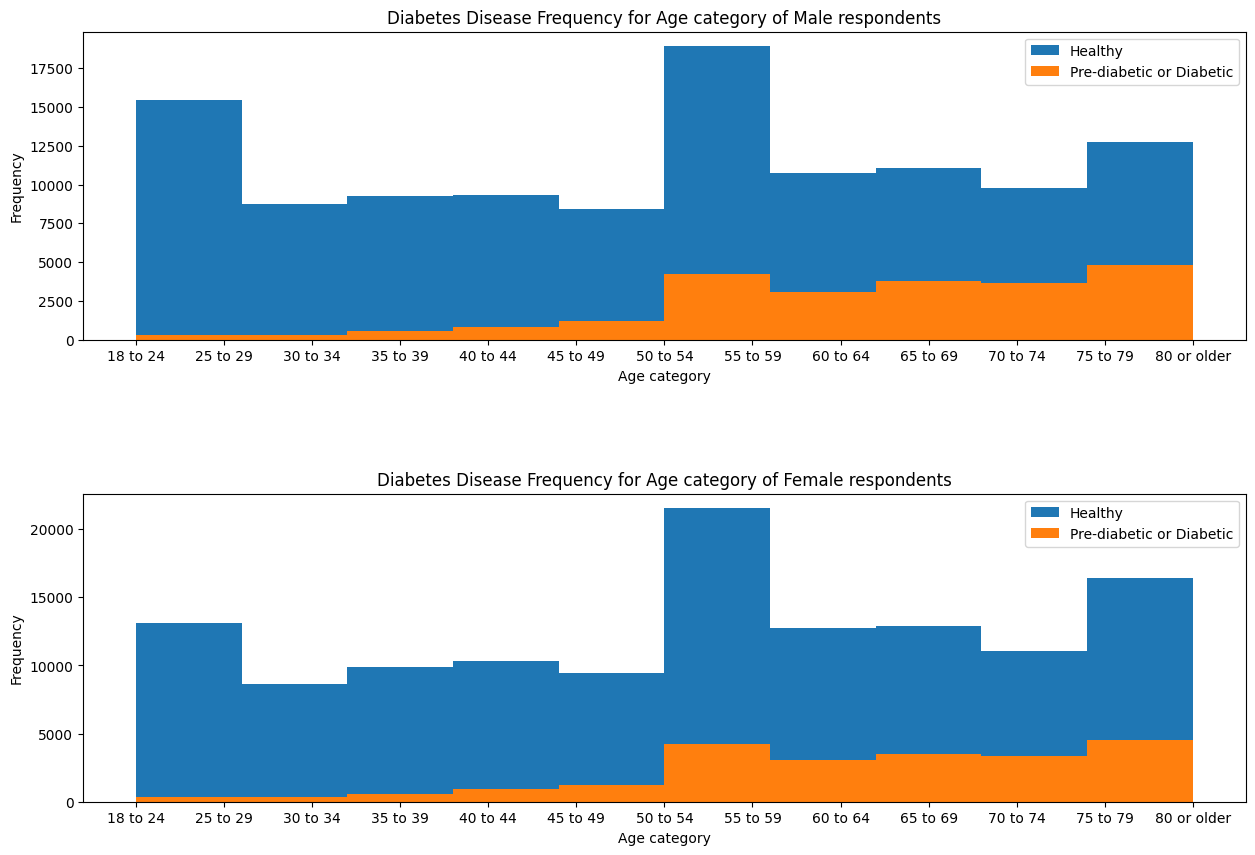

In [54]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)   
plt.hist(age_male_0, label = 'Healthy')
plt.hist(age_male_1, label = 'Pre-diabetic or Diabetic')
plt.legend()
plt.xlabel("Age category")
plt.ylabel("Frequency")
plt.title('Diabetes Disease Frequency for Age category of Male respondents')

plt.subplot(2,1,2)
plt.hist(age_female_0, label = 'Healthy')
plt.hist(age_female_1, label = 'Pre-diabetic or Diabetic')
plt.legend()
plt.xlabel("Age category")
plt.ylabel("Frequency")
plt.title('Diabetes Disease Frequency for Age category of Female respondents')

plt.subplots_adjust(hspace = 0.5)
plt.show()

In [55]:
pd.DataFrame(data_binary.groupby([age, sex]).count()['Diabetes_01'])

Diabetes_01
Age         Sex                
18 to 24    Female         6290
            Male           7980
25 to 29    Female         7186
            Male           7788
30 to 34    Female         9024
            Male           9024
35 to 39    Female        10447
            Male           9836
40 to 44    Female        11275
            Male          10124
45 to 49    Female        10705
            Male           9604
50 to 54    Female        12545
            Male          11048
55 to 59    Female        13229
            Male          12101
60 to 64    Female        15818
            Male          13831
65 to 69    Female        16370
            Male          14853
70 to 74    Female        14399
            Male          13439
75 to 79    Female        10492
            Male           9153
80 or older Female        10412
            Male           8416

We can see that age by gender shows us again that both men and women have an equal risk of developing diabetes.

#### Relationship between Income and Diabetes

C:\Users\shrus\AppData\Local\Temp\ipykernel_19200\1281722093.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels = (['Less than 15,000', '15,000 to 25,000', '25,000 to 35,000',


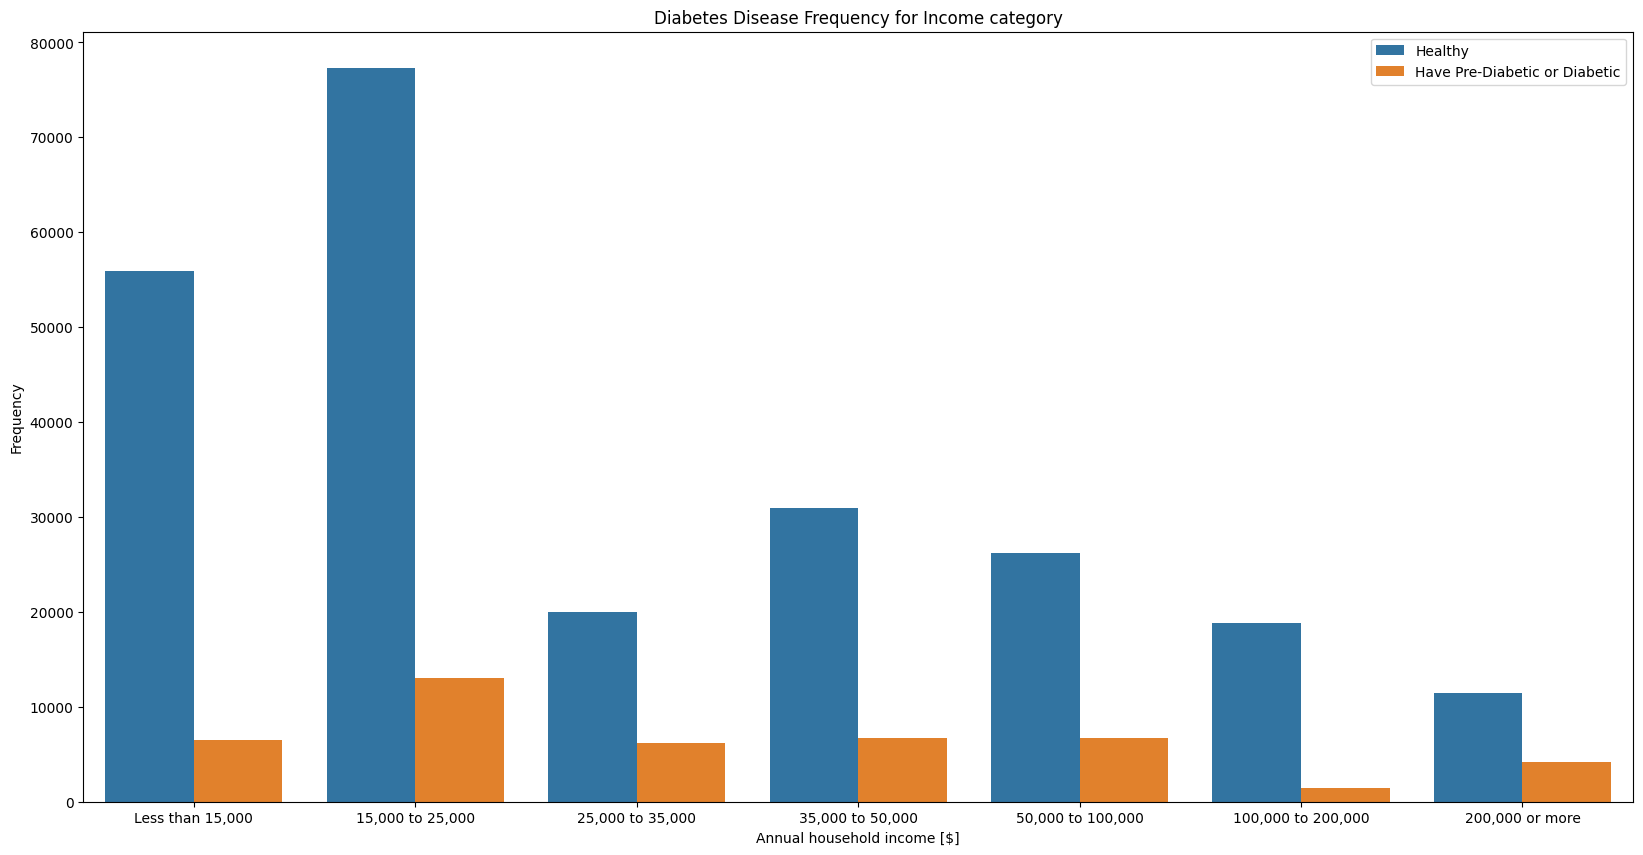

In [56]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=income, data=data_binary, hue=diabetes)
ax.set(xticklabels = (['Less than 15,000', '15,000 to 25,000', '25,000 to 35,000', 
                       '35,000 to 50,000', '50,000 to 100,000' , '100,000 to 200,000', '200,000 or more']))
plt.title('Diabetes Disease Frequency for Income category')
plt.legend(["Healthy", "Have Pre-Diabetic or Diabetic"])
plt.ylabel('Frequency')
plt.xlabel('Annual household income [$]')
plt.show()

In [57]:
income_df = pd.crosstab(income, diabetes, rownames=['Income category [$]'], colnames=['Diabetes'])
income_df['Healthy [%]'] = round((income_df['Healthy'] / income_df['Healthy'].sum()) * 100,1)
income_df['Pre-diabetic or Diabetic [%]'] = round((income_df['Pre-diabetic or Diabetic'] /
                                                   income_df['Pre-diabetic or Diabetic'].sum()) * 100,1)
income_df

Diabetes,Healthy,Pre-diabetic or Diabetic,Healthy [%],Pre-diabetic or Diabetic [%]
Income category [$],,,,
"100,000 to 200,000",55936,6533,23.3,14.6
"15,000 to 25,000",19973,6235,8.3,13.9
"200,000 more",18815,1453,7.8,3.2
"25,000 to 35,000",26176,6713,10.9,15.0
"35,000 to 50,000",30930,6731,12.9,15.0
"50,000 to 100,000",77264,13068,32.1,29.1
"Less than 15,000",11408,4154,4.7,9.3


#### Relationship between General Health and Physical Activity

C:\Users\shrus\AppData\Local\Temp\ipykernel_19200\2412949971.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels = (['Excellent', 'Very good', 'Good', 'Fair', 'Poor']))


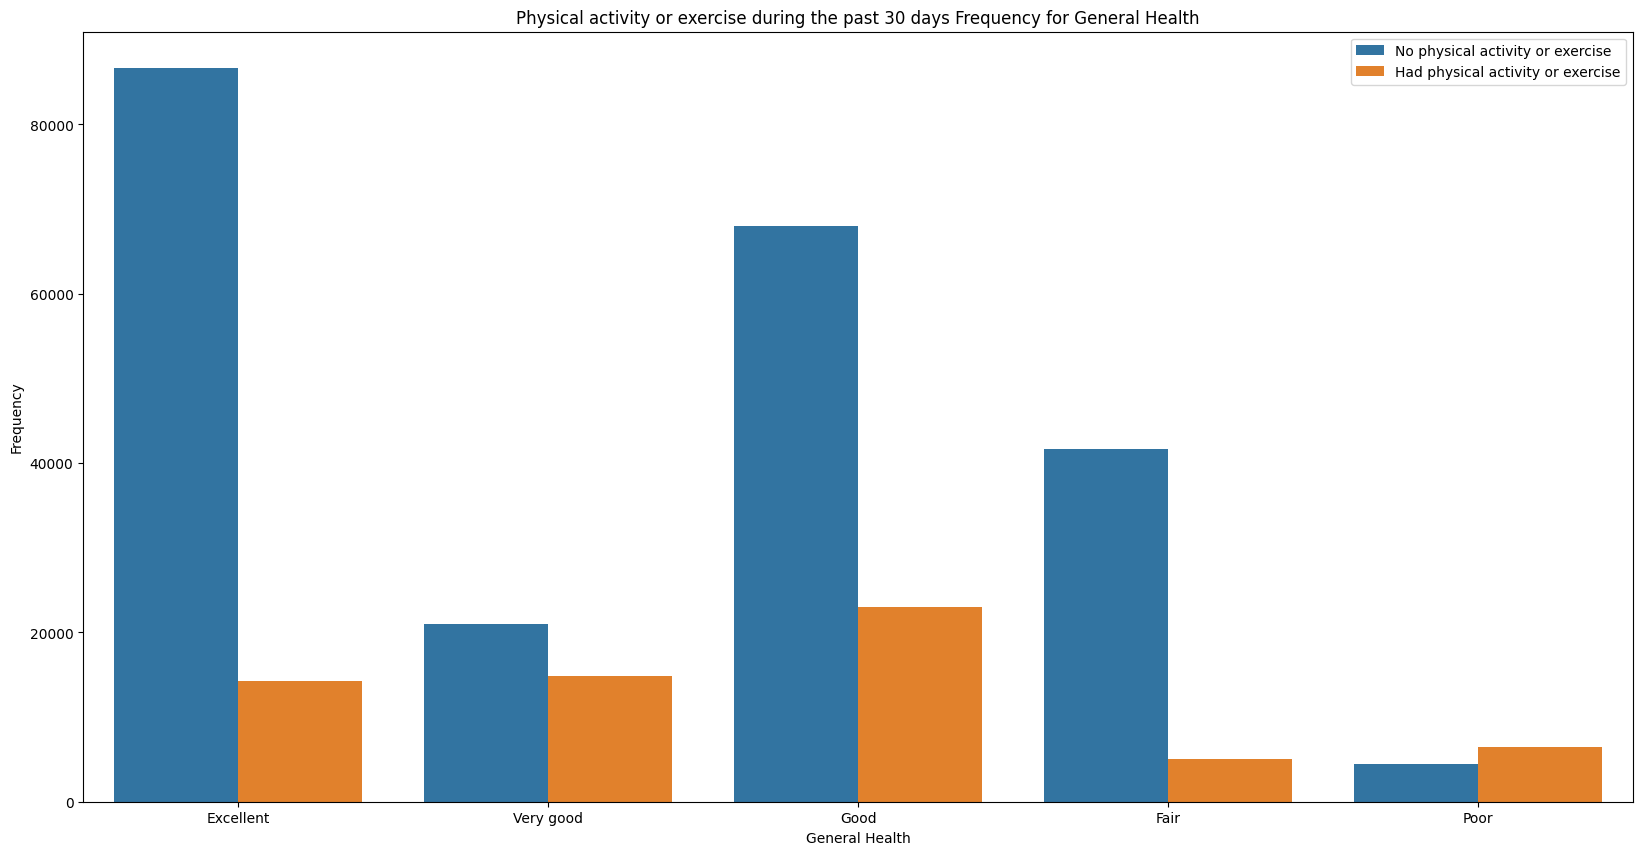

In [58]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=generalhealth, data=data_binary, hue=activity)
ax.set(xticklabels = (['Excellent', 'Very good', 'Good', 'Fair', 'Poor']))
plt.title('Physical activity or exercise during the past 30 days Frequency for General Health')
plt.legend(["No physical activity or exercise", "Had physical activity or exercise"])
plt.ylabel('Frequency')
plt.xlabel('General Health')
plt.show()

In [59]:
health_activity_df = pd.crosstab(generalhealth, activity, rownames=['General Health'], 
                                 colnames=['Physical activity during the past 30 days'])
health_activity_df['Had physical activity or exercise [%]'] = round(
    (health_activity_df['Had physical activity or exercise'] / 
     health_activity_df['Had physical activity or exercise'].sum())*100,1)
health_activity_df['No physical activity or exercise [%]'] = round(
    (health_activity_df['No physical activity or exercise'] / 
    health_activity_df['No physical activity or exercise'].sum())*100,1)
health_activity_df

Physical activity during the past 30 days,Had physical activity or exercise,No physical activity or exercise,Had physical activity or exercise [%],No physical activity or exercise [%]
General Health,,,,
Excellent,41665,5090,18.8,8.0
Fair,20969,14801,9.5,23.2
Good,68040,23031,30.7,36.2
Poor,4422,6515,2.0,10.2
Very good,86615,14241,39.1,22.4


We can see that whether someone exercises at least once a month has a big impact on their well-being.
People who exercise at least once a month assess their health as good, very good or delicious much more often than people who do not exercise.

#### Relationship between General Health and Income

C:\Users\shrus\AppData\Local\Temp\ipykernel_19200\3235116486.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(xticklabels = (['Excellent', 'Very good', 'Good', 'Fair', 'Poor']))


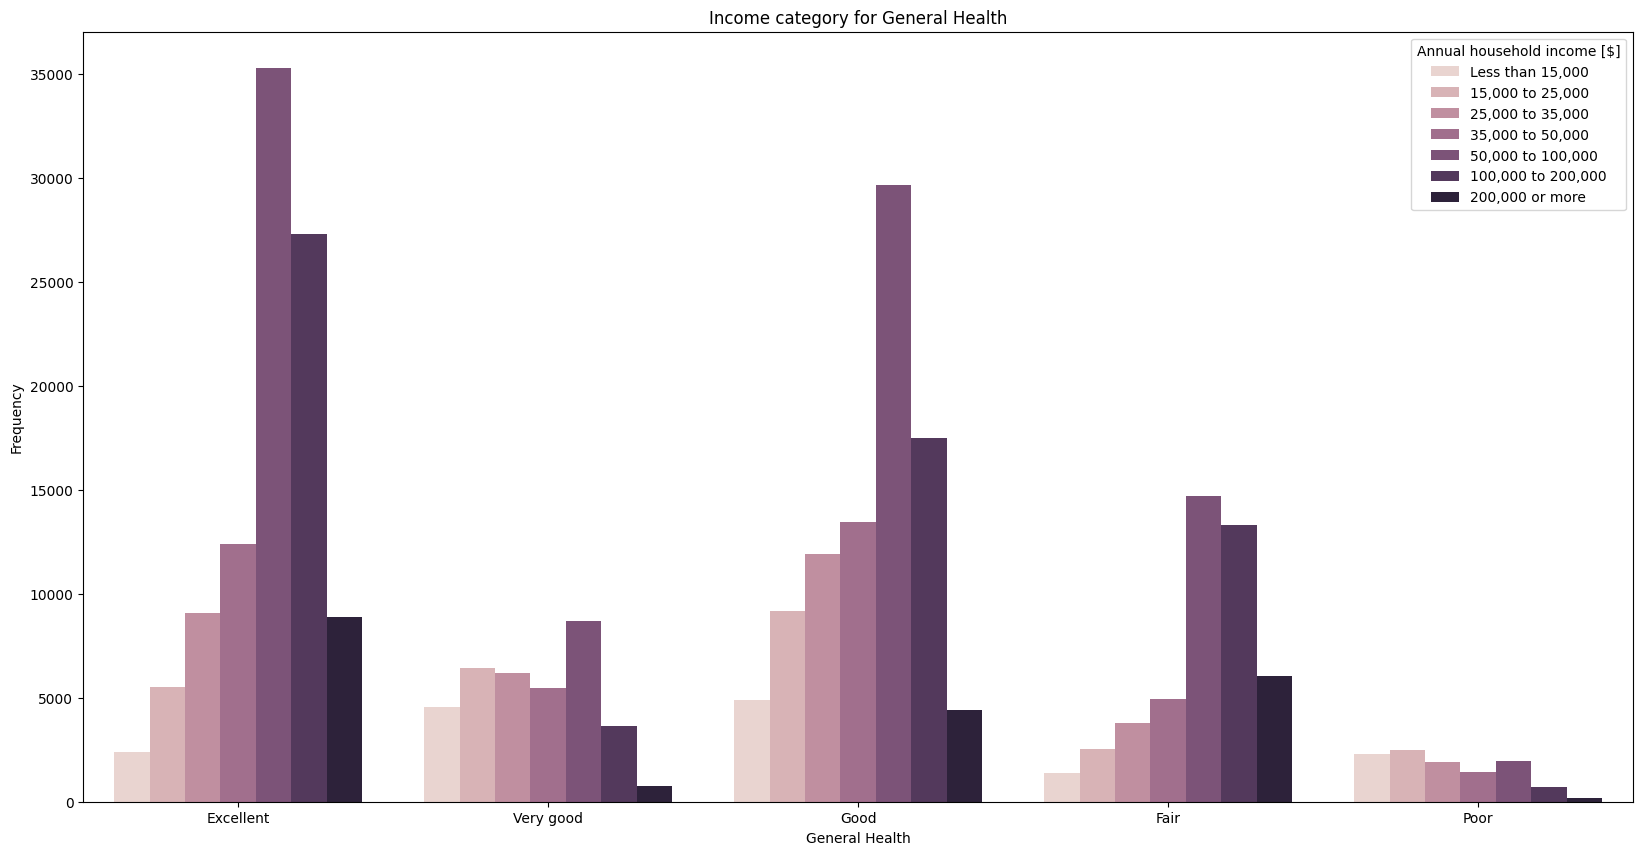

In [61]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=generalhealth, data=data_binary, hue='Income')
ax.set(xticklabels = (['Excellent', 'Very good', 'Good', 'Fair', 'Poor']))
plt.title('Income category for General Health')
plt.legend(['Less than 15,000', '15,000 to 25,000', '25,000 to 35,000', 
            '35,000 to 50,000','50,000 to 100,000' , '100,000 to 200,000', '200,000 or more' ]).set_title('Annual household income [$]')
plt.ylabel('Frequency')
plt.xlabel('General Health')
plt.show()

In [62]:
health_income_df = pd.crosstab(income, generalhealth, rownames=['Income category'], colnames=['General Health'])
health_income_df['Excellent [%]'] = round((health_income_df['Excellent'] / health_income_df['Excellent'].sum())*100,1)
health_income_df['Fair [%]'] = round((health_income_df['Fair'] / health_income_df['Fair'].sum())*100,1)
health_income_df['Good [%]'] = round((health_income_df['Good'] / health_income_df['Good'].sum())*100,1)
health_income_df['Poor [%]'] = round((health_income_df['Poor'] / health_income_df['Poor'].sum())*100,1)
health_income_df['Very good [%]'] = round((health_income_df['Very good'] / health_income_df['Very good'].sum())*100,1)
health_income_df

General Health,Excellent,Fair,Good,Poor,Very good,Excellent [%],Fair [%],Good [%],Poor [%],Very good [%]
Income category,,,,,,,,,,
"100,000 to 200,000",13305,3659,17519,691,27295,28.5,10.2,19.2,6.3,27.1
"15,000 to 25,000",2559,6428,9193,2500,5528,5.5,18.0,10.1,22.9,5.5
"200,000 more",6060,774,4390,172,8872,13.0,2.2,4.8,1.6,8.8
"25,000 to 35,000",3797,6188,11942,1897,9065,8.1,17.3,13.1,17.3,9.0
"35,000 to 50,000",4942,5470,13441,1408,12400,10.6,15.3,14.8,12.9,12.3
"50,000 to 100,000",14697,8700,29688,1964,35283,31.4,24.3,32.6,18.0,35.0
"Less than 15,000",1395,4551,4898,2305,2413,3.0,12.7,5.4,21.1,2.4


We can see that earnings also have an impact on your well-being.
People earning more than 50,000 USD feel at least well more often. It is also evident that among the people who feel poor, the most are those who earn the least.\
Higher earnings can translate into a greater sense of security or a healthier lifestyle, which can result in better overall health.